In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [ ]:
# Mengimput dataset TravelInsurancePrediction.csv
#df = pd.read_csv("TravelInsurancePrediction.csv")
url='https://drive.google.com/file/d/1hDfrC_4mjz5Ps24h8pzUiD8PShSQwiRh/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

# 1. Descriptive Statistics

In [ ]:
# Memeriksa kolom-kolom dan nilai hilang dengan df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [ ]:
# Sampling untuk memahami data dengan df.sample()
df.sample(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1793,1793,34,Private Sector/Self Employed,Yes,1500000,3,0,Yes,Yes,1
1411,1411,29,Private Sector/Self Employed,Yes,1200000,3,1,No,No,1
1967,1967,34,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
1618,1618,28,Government Sector,Yes,300000,4,0,No,No,0
1724,1724,28,Private Sector/Self Employed,Yes,900000,4,0,Yes,No,1


In [ ]:
# Pengelompokan kolom berdasarkan tipe datanya
cats = ["Employment Type", "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"]
nums = ["Unnamed: 0", "Age", "AnnualIncome", "FamilyMembers", "ChronicDiseases", "TravelInsurance"]

In [ ]:
# Cek deskripsi statistika untuk tipe data numeric
df[nums].describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
# Cek deskripsi statistika untuk tipe data categorical
df[cats].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


# 2. Univariate Analysis

In [ ]:
cats1 = ["Employment Type", "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad" , "ChronicDiseases", "TravelInsurance"]
nums1 = ["Unnamed: 0", "Age", "AnnualIncome", "FamilyMembers"]

## Boxplots

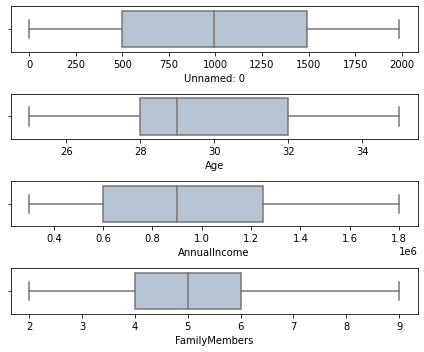

In [ ]:
# Num type dengan box plot untuk melihat nilai max, min, median, dan IQR
features = nums1
plt.figure(figsize = (6, 5))
for i in range(0, len(features)):
    plt.subplot(4, 1, i+1)
    sns.boxplot(x = df[features[i]], color = '#B0C4D7')
    plt.xlabel(features[i])
    plt.tight_layout()

## Violinplots

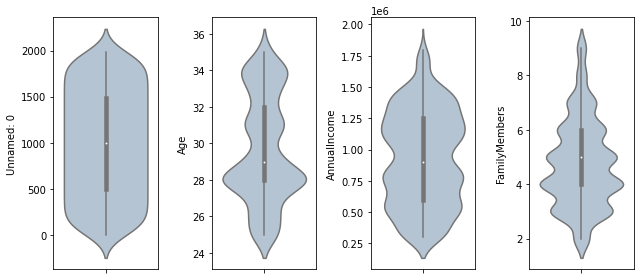

In [ ]:
# Violin plot untuk melihat persebaran data
features = nums1
plt.figure(figsize = (9, 4))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y = df[features[i]], color = '#B0C4D7')
    plt.tight_layout()

## KDEplots

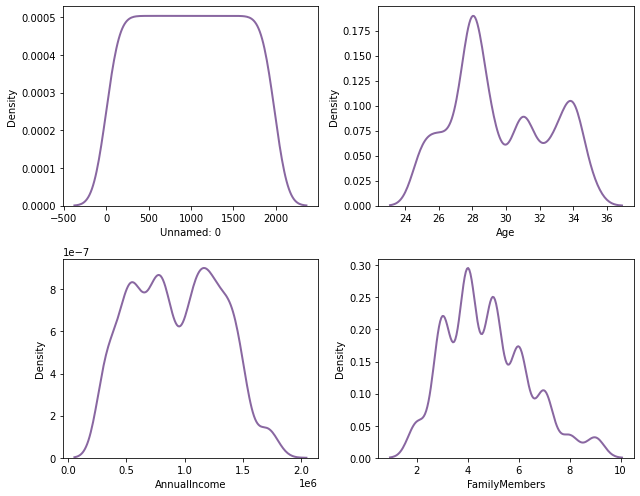

In [ ]:
# Melihat frekuensi terbanyak pada num type
features = nums1
plt.figure(figsize = (9, 7))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(x = df[features[i]], color = '#8967A1', lw = 2)
    plt.xlabel(features[i])
    plt.tight_layout()

## Histogram

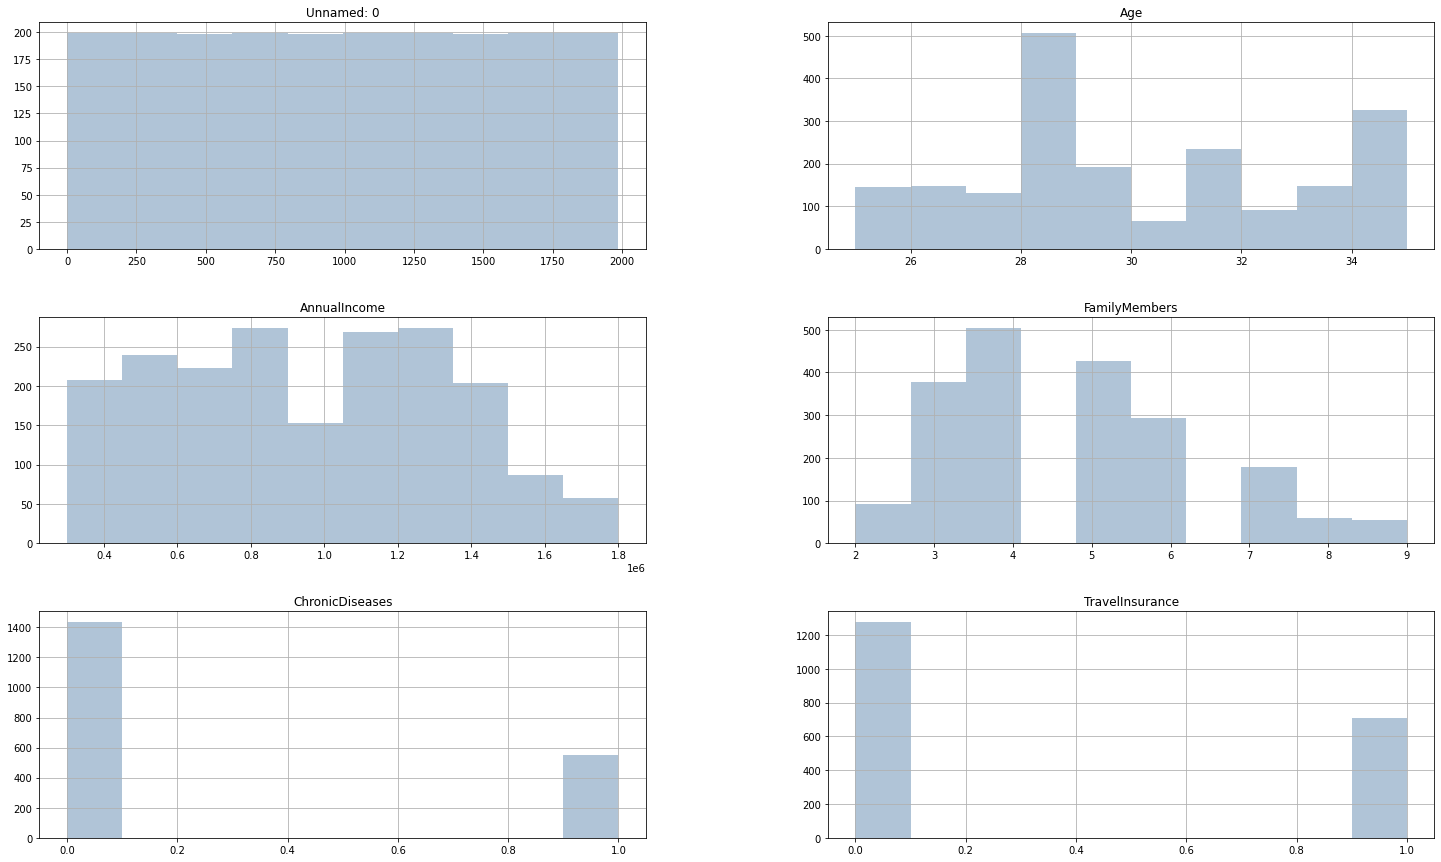

In [ ]:
# Melihat persebaran distribusi data
df.hist(figsize = (25, 15), color = '#B0C4D7')
plt.show()

*   Jumlah data perorangan paling banyak di usia 28 tahun sebanyak 500 orang
*   Family members paling banyak terdiri dari 4 orang
*   Tidak banyak yang memiliki chronic diseases
*   Lebih banyak tidak menggunakan travel insurance

## Countplot

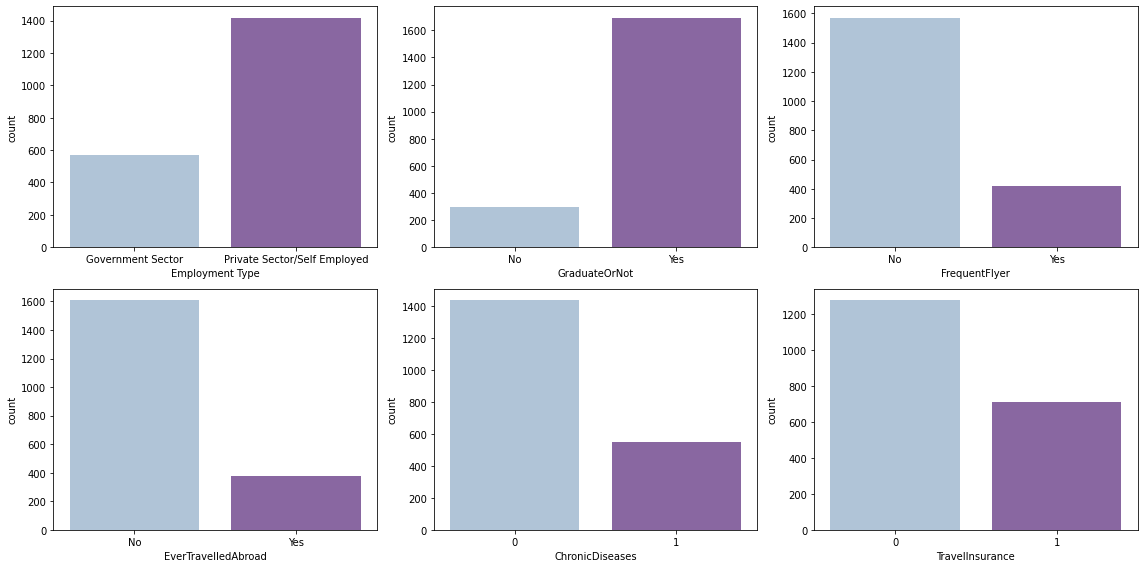

In [ ]:
# Melihat persebaran data untuk tipe data kategorik
features = cats1
plt.figure(figsize = (16,8))
for i in range(0, len(features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[features[i]].astype('category'), data = df, palette = 'BuPu')
    plt.xlabel(features[i])
    plt.tight_layout()

### TravelInsurance

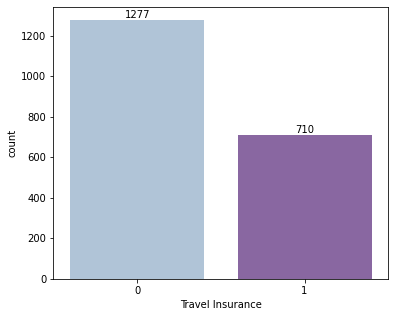

In [ ]:
# jumlah yang beli dan tidak beli TravelInsurance
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Travel Insurance')
plt.show()

In [ ]:
#menghitung jumlah value dan persentase pada kolom TravelInsurance
value = "TravelInsurance"
print(f"Value count kolom {value}:")
print(df[value].value_counts())
print()
print(f"Persentase kolom {value}:")
print(round(df[value].value_counts([value])*100, 2))

Value count kolom TravelInsurance:
0    1277
1     710
Name: TravelInsurance, dtype: int64

Persentase kolom TravelInsurance:
0    64.27
1    35.73
Name: TravelInsurance, dtype: float64


Dapat disimpulkan dari grafik di atas hanya 35.73% yang menggunakan travel insurance dan sisanya 64.27% yang tidak menggunakan travel insurance.

### EverTravelledAbroad

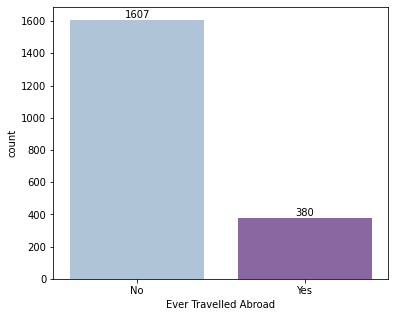

In [ ]:
#countplot untuk melihat status pernah keluar negeri
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'EverTravelledAbroad', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Ever Travelled Abroad')
plt.show()

In [ ]:
#menghitung jumlah value dan persentase pada kolom EverTravelledAbroad
value = "EverTravelledAbroad"
print(f"Value count kolom {value}:")
print(df[value].value_counts())
print()
print(f"Persentase kolom {value}:")
print(round(df[value].value_counts([value])*100, 2))

Value count kolom EverTravelledAbroad:
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64

Persentase kolom EverTravelledAbroad:
No     80.88
Yes    19.12
Name: EverTravelledAbroad, dtype: float64


Dapat disimpulkan dari grafik di atas hanya 19.12% yang pernah melakukan perjalanan ke luar negeri dan sisanya 80.88% yang pernah tidak melakukan perjalanan ke luar negeri.

### Employment Type

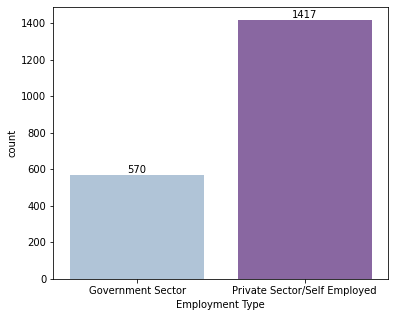

In [ ]:
#countplot untuk melihat status pekerjaan 
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'Employment Type', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Employment Type')
plt.show()

In [ ]:
#menghitung jumlah value dan persentase pada kolom Employment Type
value = "Employment Type"
print(f"Value count kolom {value}:")
print(df[value].value_counts())
print()
print(f"Persentase kolom {value}:")
print(round(df[value].value_counts([value])*100, 2))

Value count kolom Employment Type:
Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

Persentase kolom Employment Type:
Private Sector/Self Employed    71.31
Government Sector               28.69
Name: Employment Type, dtype: float64


Dapat disimpulkan dari grafik di atas tipe pekerjaan selfemployed atau private sector dominan dengan persentase 71.31% dan tipe pekerjaan Goverment Sector dengan persentase 28.69%.

### ChronicDiseases

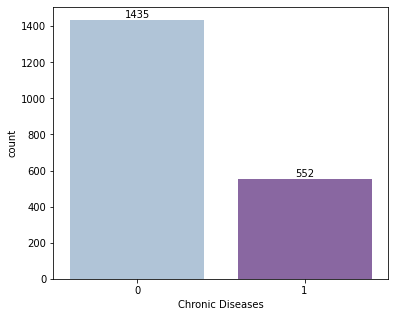

In [ ]:
#countplot untuk melihat status kesehatan
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'ChronicDiseases', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Chronic Diseases')
plt.show()

In [ ]:
#menghitung jumlah value dan persentase pada kolom ChronicDiseases
value = "ChronicDiseases"
print(f"Value count kolom {value}:")
print(df[value].value_counts())
print()
print(f"Persentase kolom {value}:")
print(round(df[value].value_counts([value])*100, 2))

Value count kolom ChronicDiseases:
0    1435
1     552
Name: ChronicDiseases, dtype: int64

Persentase kolom ChronicDiseases:
0    72.22
1    27.78
Name: ChronicDiseases, dtype: float64


Dapat disimpulkan dari grafik di atas banyak yang tidak memiliki penyakit kronis dengan persentase 72.22% dan sisanya 27.78% memliki penyakit kronis.

### GraduateOrNot

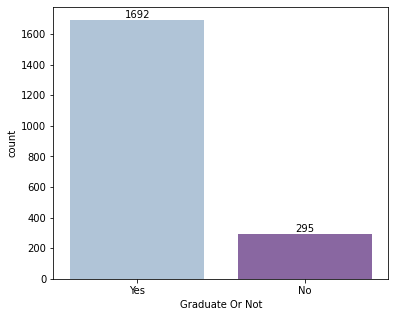

In [ ]:
#countplot untuk melihat status pendidikan 
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'GraduateOrNot', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Graduate Or Not')
plt.show()

In [ ]:
#menghitung jumlah value dan persentase pada kolom GraduateOrNot
value = "GraduateOrNot"
print(f"Value count kolom {value}:")
print(df[value].value_counts())
print()
print(f"Persentase kolom {value}:")
print(round(df[value].value_counts([value])*100, 2))

Value count kolom GraduateOrNot:
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

Persentase kolom GraduateOrNot:
Yes    85.15
No     14.85
Name: GraduateOrNot, dtype: float64


Dapat disimpulkan dari grafik di atas 85.15% sudah memiliki gelar sarjana dan sisanya 14.85% tidak memiliki gelar sarjana.

### FrequentFlyer

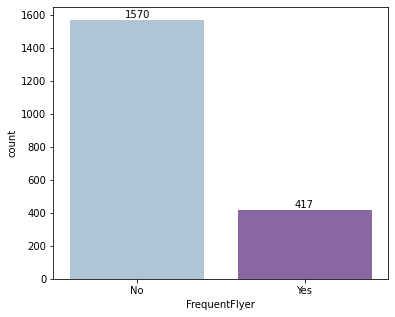

In [ ]:
#countplot untuk melihat jumlah keluarga
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'FrequentFlyer', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('FrequentFlyer')
plt.show()

In [ ]:
#menghitung jumlah value dan persentase pada kolom GraduateOrNot
value = "FrequentFlyer"
print(f"Value count kolom {value}:")
print(df[value].value_counts())
print()
print(f"Persentase kolom {value}:")
print(round(df[value].value_counts([value])*100, 2))

Value count kolom FrequentFlyer:
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

Persentase kolom FrequentFlyer:
No     79.01
Yes    20.99
Name: FrequentFlyer, dtype: float64


Dapat disimpulkan dari grafik di atas 79.01% jarang melakukan penerbangan dan sisanya 20.99% sering melakukan penerbangan.

### FamilyMembers

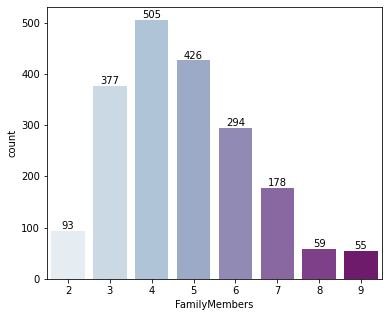

In [ ]:
#countplot untuk melihat jumlah keluarga
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'FamilyMembers', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('FamilyMembers')
plt.show()

Dapat disimpulkan dari grafik di atas paling banyak memiliki family member 3-5 orang dan yang terbanyak ada di family member 4 orang.

### Age

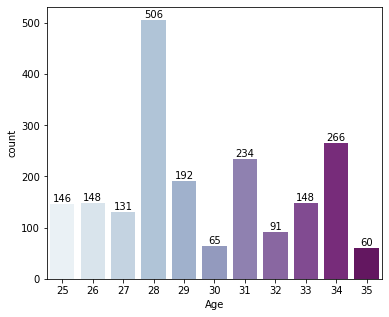

In [ ]:
#countplot untuk melihat umur
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'Age', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Age')
plt.show()

Dapat disimpulkan dari grafik di atas, responden terbanyak berada pada umur 28 dan disusul oleh responden pada umur 34.

### AnnualIncome

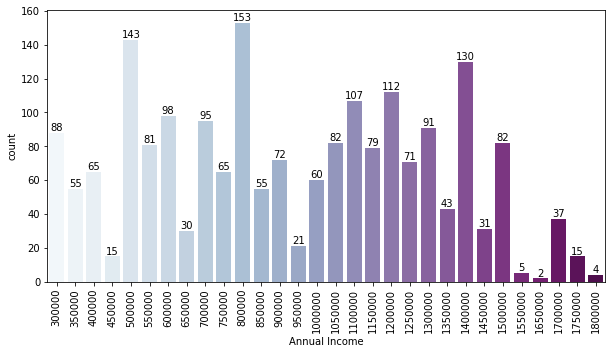

In [ ]:
#countplot untuk melihat pendapatan tahunan
plt.figure(figsize = (10,5))
ax = sns.countplot(data = df, x = 'AnnualIncome', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Annual Income')
ax.tick_params(axis = 'x', rotation = 90)
plt.show()

# 3. Multivariate Analysis

## Pairplot

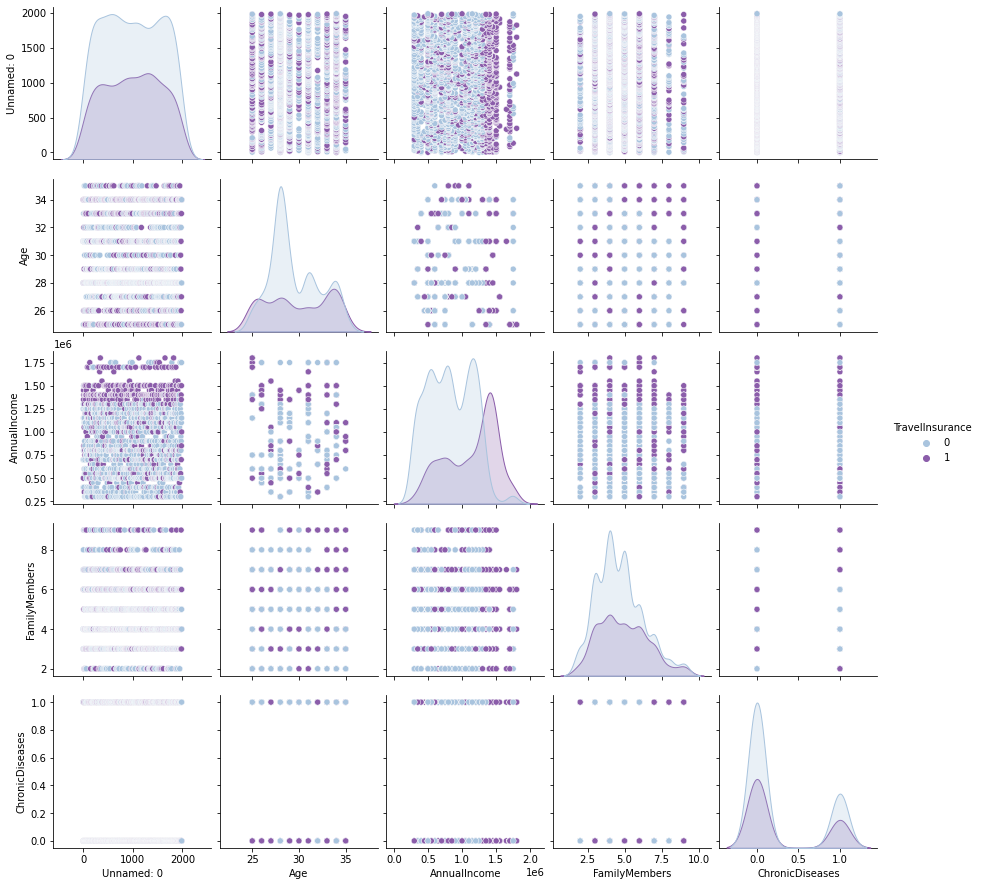

In [ ]:
#pairplot untuk melihat distribusi keseluruhan terhadap travelinsurance
sns.pairplot(df, hue = 'TravelInsurance', palette = 'BuPu')
plt.show()

## Countplots

### EverTravelledAbroad

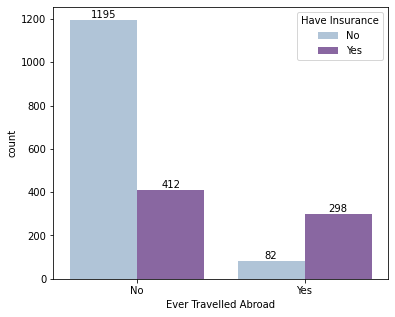

In [ ]:
#countplot untuk melihat status pernah keluar negeri terhadap pembelian asuransi
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'EverTravelledAbroad', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Ever Travelled Abroad')
plt.legend(labels = ['No','Yes'], title = 'Have Insurance')
plt.show()

### FrequentFlyer

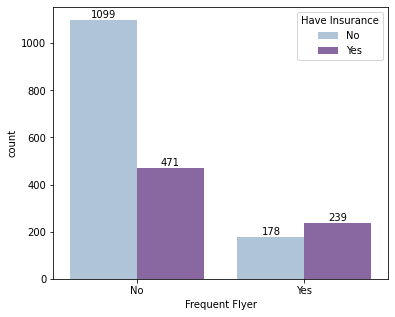

In [ ]:
#countplot untuk melihat status frequent flyer atau tidak
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'FrequentFlyer', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Frequent Flyer')
plt.legend(labels = ['No','Yes'], title = 'Have Insurance')
plt.show()

### ChronicDiseases

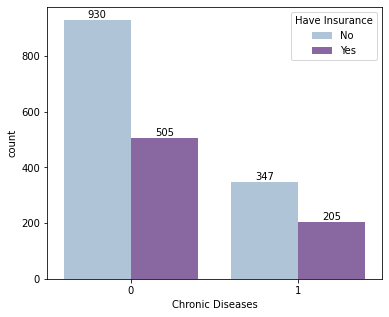

In [ ]:
#countplot untuk melihat status sakit kronis terhadap pembelian asuransi
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'ChronicDiseases', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Chronic Diseases')
plt.legend(labels = ['No','Yes'], title = 'Have Insurance')
plt.show()

### Employment Type

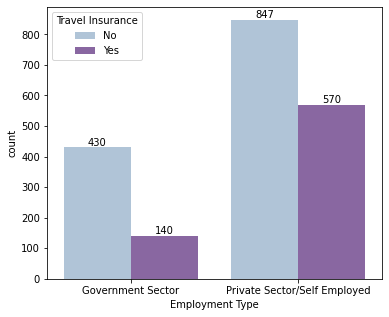

In [ ]:
#countplot untuk melihat status pekerjaan terhadap pembelian asuransi
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'Employment Type', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Employment Type')
plt.legend(labels = ['No','Yes'],title = 'Travel Insurance')
plt.show()

### GraduateOrNot

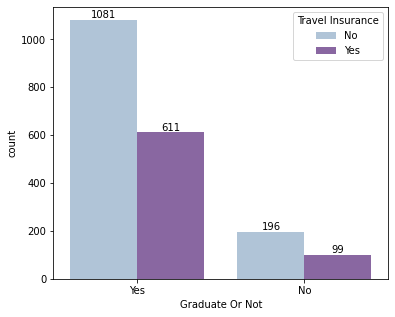

In [ ]:
#countplot untuk melihat status pendidikan terhadap pembelian asuransi
plt.figure(figsize = (6,5))
ax = sns.countplot(data = df, x = 'GraduateOrNot', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Graduate Or Not')
plt.legend(labels = ['No','Yes'], title = 'Travel Insurance')
plt.show()

### FamilyMembers

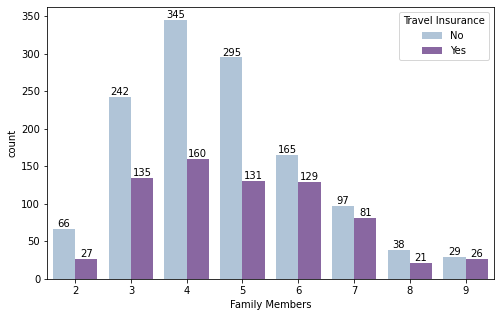

In [ ]:
#countplot untuk melihat jumlah keluarga terhadap pembelian asuransi
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df, x = 'FamilyMembers', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Family Members')
plt.legend(labels = ['No','Yes'], title = 'Travel Insurance')
plt.show()

### Age

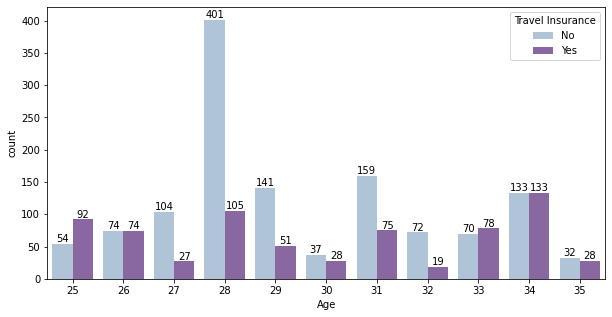

In [ ]:
#countplot untuk melihat jumlah keluarga terhadap pembelian asuransi
plt.figure(figsize = (10,5))
ax = sns.countplot(data = df, x = 'Age', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Age')
plt.legend(labels = ['No','Yes'], title = 'Travel Insurance')
plt.show()

### AnnualIncome

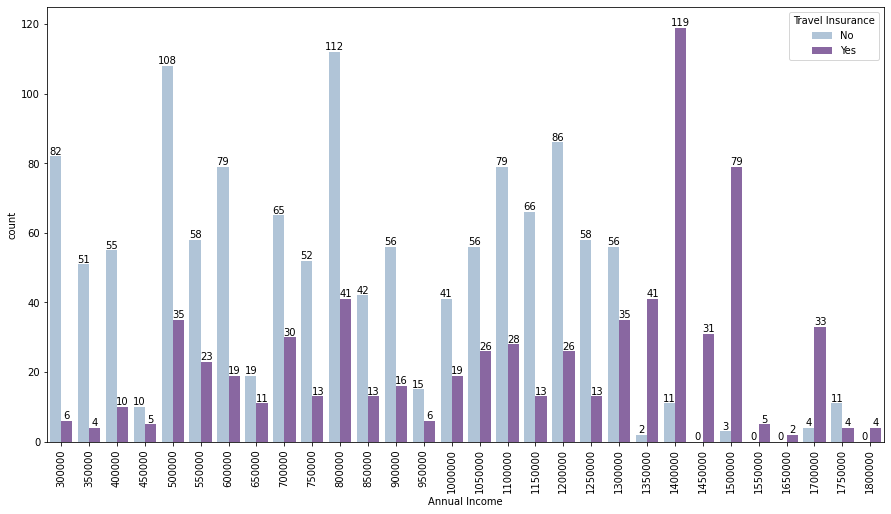

In [ ]:
#countplot untuk melihat pendapatan tahunan terhadap pembelian asuransi
plt.figure(figsize = (15, 8))
ax = sns.countplot(data = df, x = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Annual Income')
plt.legend(labels = ['No','Yes'], title = 'Travel Insurance')
ax.tick_params(axis = 'x', rotation = 90)
plt.show()

## Pearson Correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Unnamed: 0'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'AnnualIncome'),
  Text(3.5, 0, 'FamilyMembers'),
  Text(4.5, 0, 'ChronicDiseases'),
  Text(5.5, 0, 'TravelInsurance')])

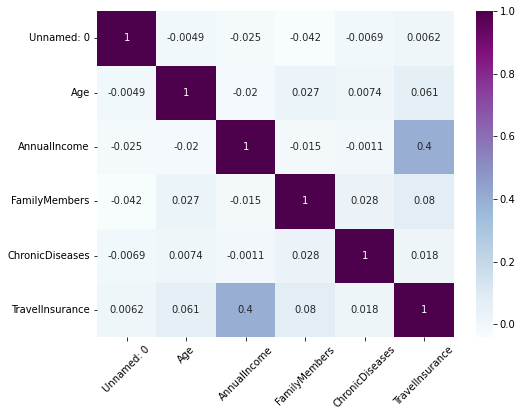

In [ ]:
#heatmap korelasi pearson
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True, cmap = 'BuPu')
plt.xticks(rotation = 45)

## Lineplots

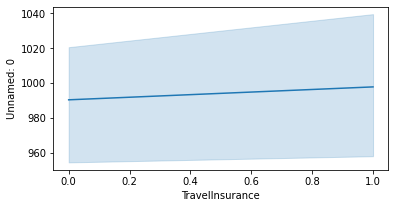

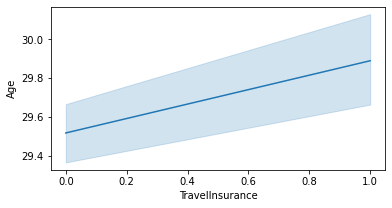

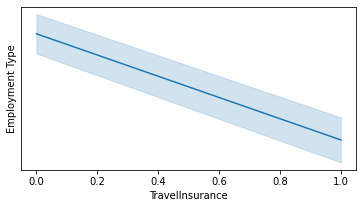

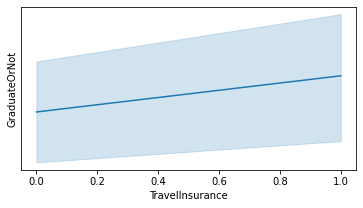

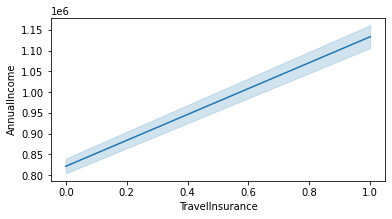

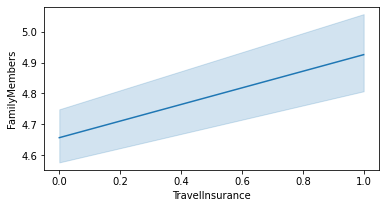

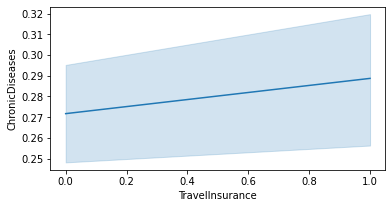

In [ ]:
rand = 0
for index in df.columns:
    rand = rand + 1
    if rand < 8: # total 14 columns but we don't need output columns
        figure = plt.figure(figsize = (6,3))
        sns.lineplot(x = "TravelInsurance", y = index, data = df)
        plt.show()
    else:
        break

# 4. Business Insight

## Boxplots

In [ ]:
datasetV = df.copy()
datasetV["Employment Type"] = pd.Categorical(datasetV["Employment Type"])
datasetV["GraduateOrNot"] = pd.Categorical(datasetV["GraduateOrNot"])
datasetV["FrequentFlyer"] = pd.Categorical(datasetV["FrequentFlyer"])
datasetV["EverTravelledAbroad"] = pd.Categorical(datasetV["EverTravelledAbroad"])
datasetV["TravelInsurance"] = pd.Categorical(datasetV["TravelInsurance"])

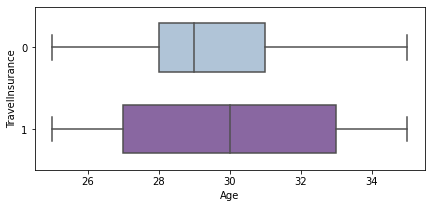

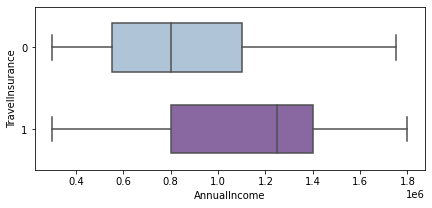

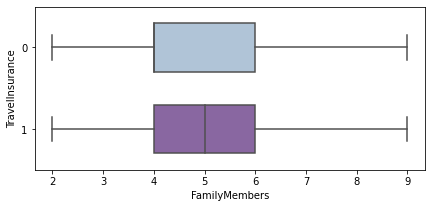

In [ ]:
to_boxplot = ["Age", "AnnualIncome","FamilyMembers"]
for index in to_boxplot:
    figure = plt.figure(figsize = (7,3))
    sns.boxplot(x = index, y = "TravelInsurance", data = datasetV, whis = [0, 100], width = .6, palette = "BuPu")
plt.show()

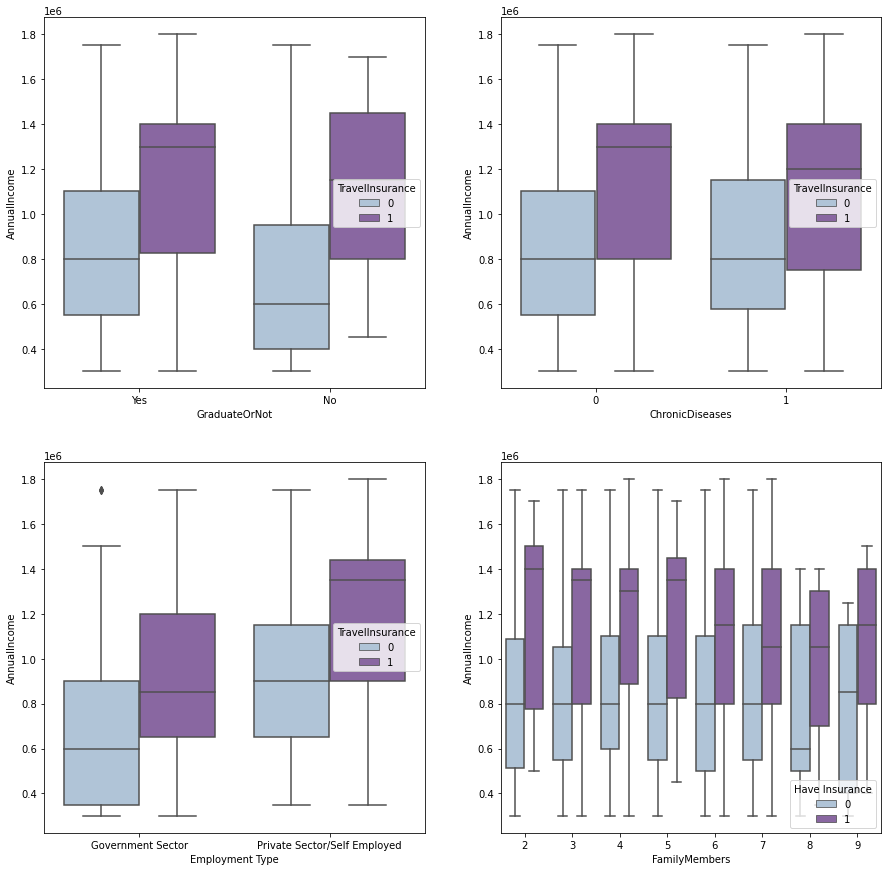

In [ ]:
fig,axes = plt.subplots(2, 2, figsize = (15, 15))
sns.boxplot(data = df,x = 'GraduateOrNot', y = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu', ax = axes[0,0])
sns.boxplot(data = df,x = 'ChronicDiseases', y = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu', ax = axes[0,1])
sns.boxplot(data = df,x = 'Employment Type', y = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu', ax = axes[1,0])
sns.boxplot(data = df,x = 'FamilyMembers', y = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu', ax = axes[1,1])
plt.legend(loc = 'lower right', title = 'Have Insurance')
plt.show()

<Axes: xlabel='Age', ylabel='AnnualIncome'>

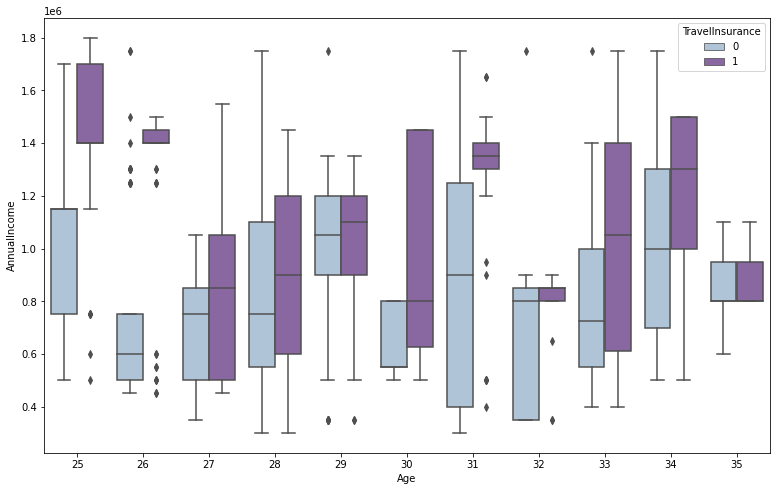

In [ ]:
plt.figure(figsize = (13,8))
sns.boxplot(data = df, x = 'Age', y = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu')

## Violinplots

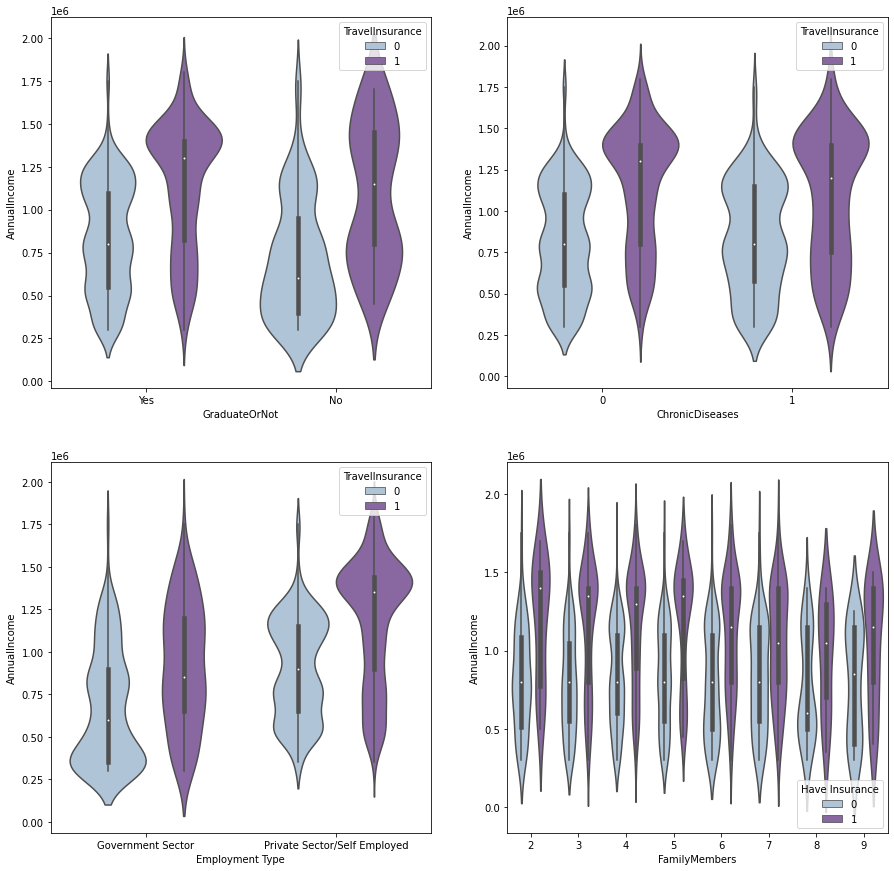

In [ ]:
fig,axes = plt.subplots(2, 2, figsize = (15, 15))
sns.violinplot(data = df,x = 'GraduateOrNot', y = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu', ax = axes[0,0])
sns.violinplot(data = df,x = 'ChronicDiseases', y = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu', ax = axes[0,1])
sns.violinplot(data = df,x = 'Employment Type', y = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu', ax = axes[1,0])
sns.violinplot(data = df,x = 'FamilyMembers', y = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu', ax = axes[1,1])
plt.legend(loc = 'lower right', title = 'Have Insurance')
plt.show()

## Histogram

In [ ]:
fig = plt.figure(figsize = (16,10))
fig = px.histogram(df, x = 'AnnualIncome', color = "TravelInsurance", title = 'Pengaruh pendapatan per tahun pada pembelian produk tavel insurance',
                   color_discrete_map = {0 : '#8967A1', 1 : '#B0C4D7'})
fig.show()

<Figure size 1152x720 with 0 Axes>

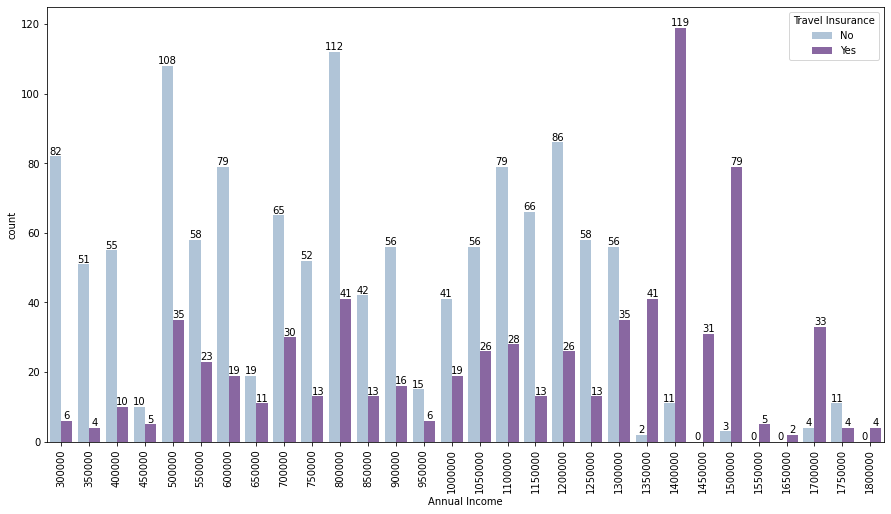

In [ ]:
#countplot untuk melihat pendapatan tahunan terhadap pembelian asuransi
plt.figure(figsize = (15, 8))
ax = sns.countplot(data = df, x = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Annual Income')
plt.legend(labels = ['No','Yes'], title = 'Travel Insurance')
ax.tick_params(axis = 'x', rotation = 90)
plt.show()

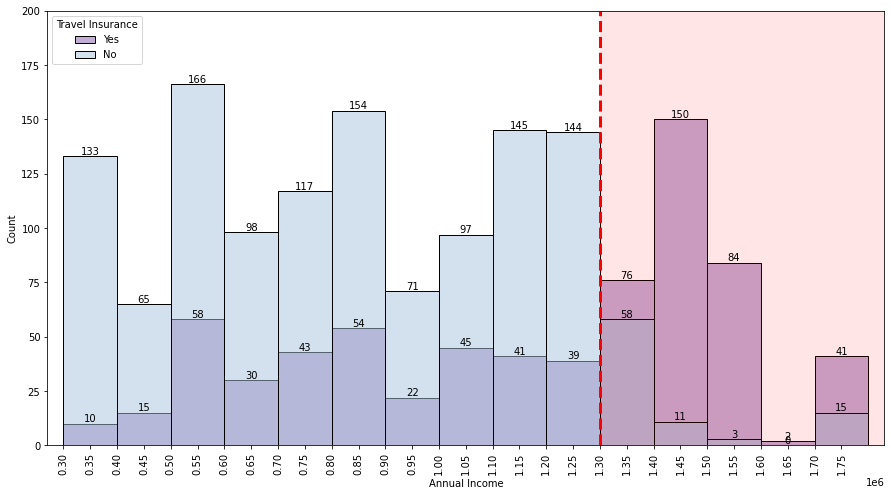

In [ ]:
#histplot untuk melihat pendapatan tahunan terhadap pembelian asuransi
plt.figure(figsize = (15, 8))
ax = sns.histplot(data = df, x = 'AnnualIncome', hue = 'TravelInsurance', palette = 'BuPu')
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Annual Income')
plt.legend(labels = ['Yes','No'], title = 'Travel Insurance', loc = 'upper left')
ax.tick_params(axis = 'x', rotation = 90)
ax.set_xticks(range(300000, 1800000, 50000))
plt.axvline(1300000, color = 'red', linestyle = '--', linewidth = 3)
ax.stackplot(np.arange(1300000, 1900000, 50000), [[200]], colors = 'red', alpha = 0.1)
ax.set_xlim(270000, 1830000)
ax.set_ylim(0, 200)
plt.show()